In [13]:
# load data set /content/student_habits_performance.csv as student_df
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

student_df = pd.read_csv('/content/student_habits_performance.csv')
print(student_df.head())

  student_id  age  gender  study_hours_per_day  social_media_hours  \
0      S1000   23  Female                  0.0                 1.2   
1      S1001   20  Female                  6.9                 2.8   
2      S1002   21    Male                  1.4                 3.1   
3      S1003   23  Female                  1.0                 3.9   
4      S1004   19  Female                  5.0                 4.4   

   netflix_hours part_time_job  attendance_percentage  sleep_hours  \
0            1.1            No                   85.0          8.0   
1            2.3            No                   97.3          4.6   
2            1.3            No                   94.8          8.0   
3            1.0            No                   71.0          9.2   
4            0.5            No                   90.9          4.9   

  diet_quality  exercise_frequency parental_education_level internet_quality  \
0         Fair                   6                   Master          Average  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# check data info
student_df.info()

# count missing value
student_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

,0
student_id,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0


In [ ]:
# summary statistics
display(student_df.describe())

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [ ]:
# categorical columns, get their value counts
for col in student_df.select_dtypes(include='object').columns:
    print(col, student_df[col].nunique(), "unique values")
    display(student_df[col].value_counts())

student_id 1000 unique values


,count
student_id,
S1999,1
S1000,1
S1001,1
S1002,1
S1003,1
...,...
S1012,1
S1011,1
S1010,1


gender 3 unique values


,count
gender,
Female,481
Male,477
Other,42


part_time_job 2 unique values


,count
part_time_job,
No,785
Yes,215


diet_quality 3 unique values


,count
diet_quality,
Fair,437
Good,378
Poor,185


parental_education_level 3 unique values


,count
parental_education_level,
High School,392
Bachelor,350
Master,167


internet_quality 3 unique values


,count
internet_quality,
Good,447
Average,391
Poor,162


extracurricular_participation 2 unique values


,count
extracurricular_participation,
No,682
Yes,318


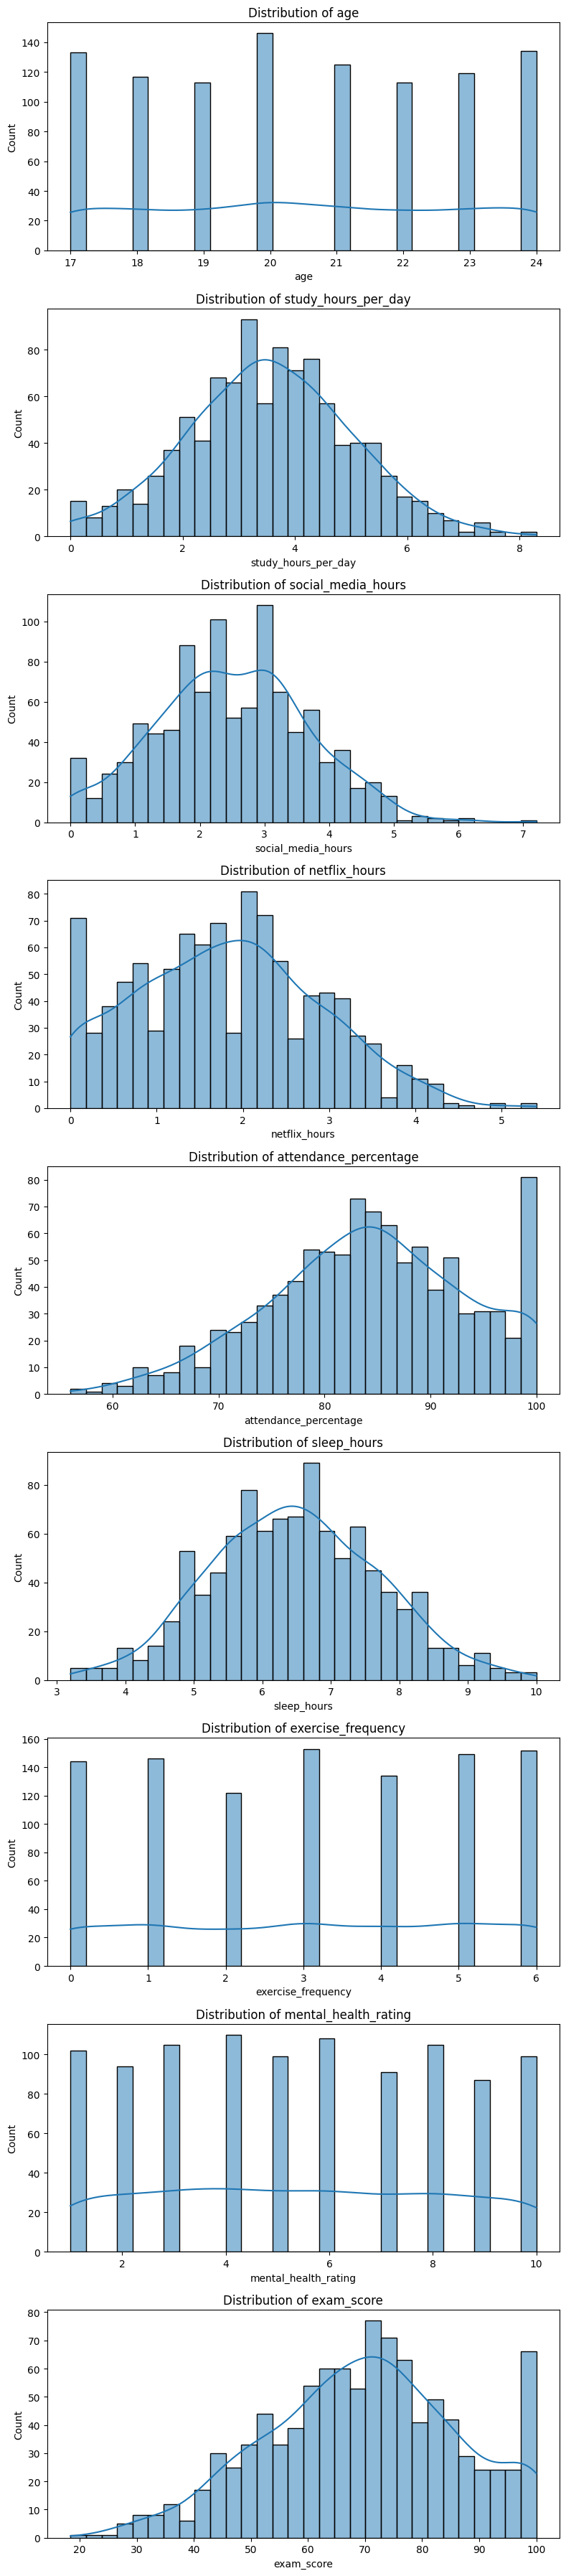

In [ ]:
# univariate distribution numeric feature
num_cols = student_df.select_dtypes(include=np.number).columns.tolist()

fig, axes = plt.subplots(len(num_cols), 1, figsize=(8, 4*len(num_cols)))
for ax, col in zip(axes, num_cols):
    sns.histplot(student_df[col].dropna(), ax=ax, kde=True, bins=30)
    ax.set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

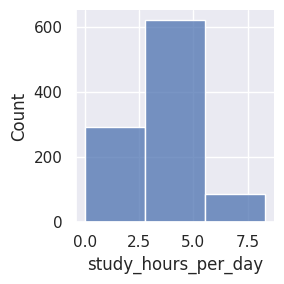

In [ ]:
# histogram by seabirn as sns

sns.set_theme(style="darkgrid")
sns.displot(
    student_df, x="study_hours_per_day",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

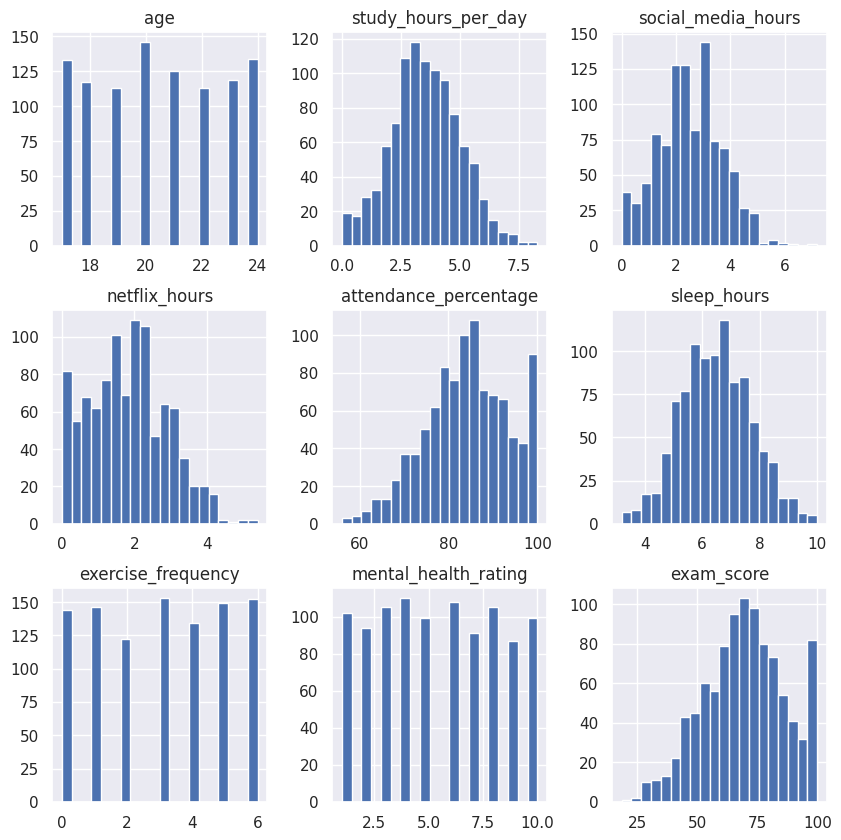

In [ ]:
# histogram all columns
student_df.hist(figsize=(10, 10), bins=20)
plt.show()

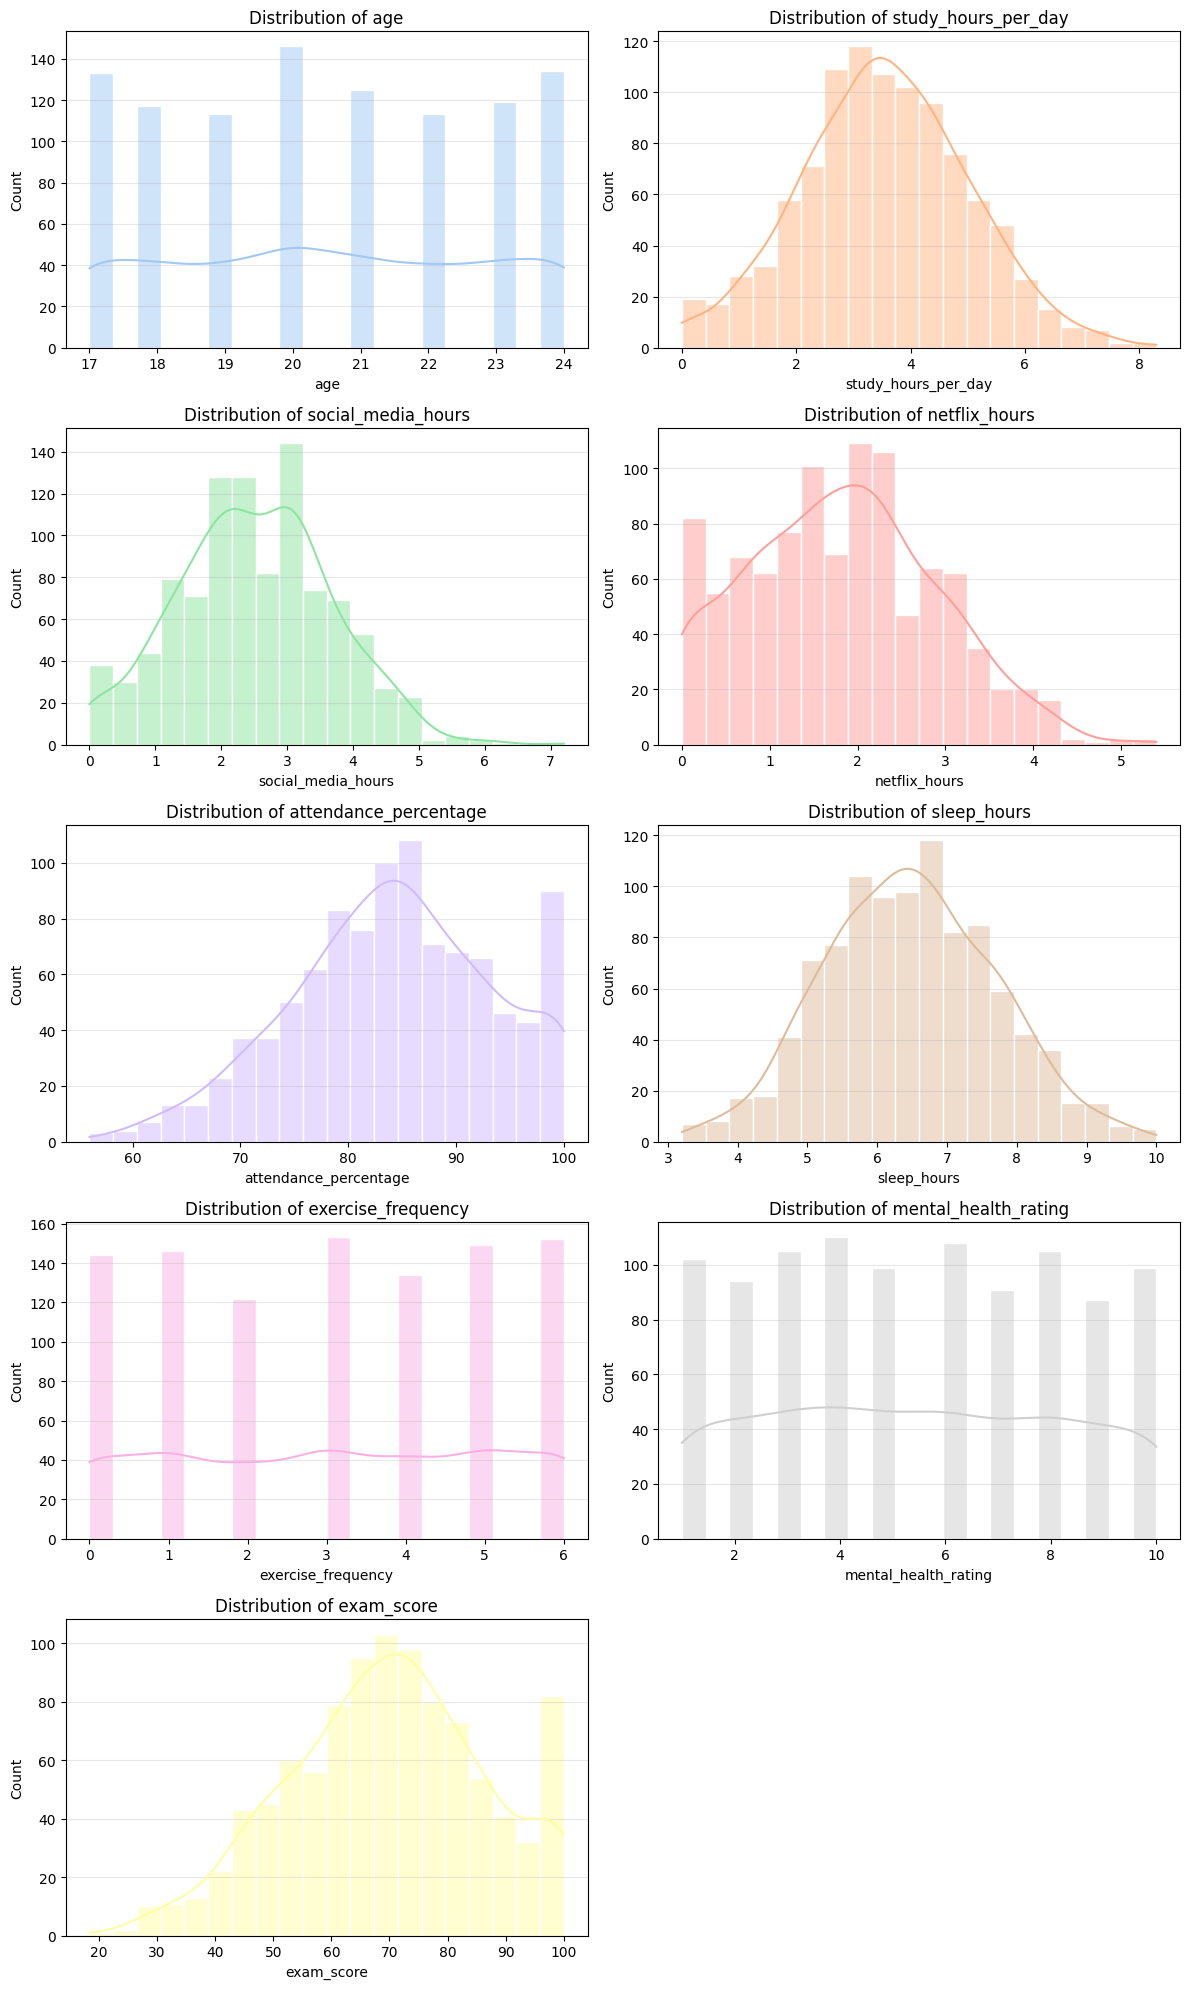

In [ ]:
# Select only numeric columns
num_cols = student_df.select_dtypes(include='number').columns.tolist()

# select only catagories columns
cat_cols = student_df.select_dtypes(include='object').columns.tolist()

# Get a pastel palette with one color per column
colors = sns.color_palette("pastel", len(num_cols))

# Decide grid size (e.g. 2 columns)
n_cols = 2
n_rows = (len(num_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()

for ax, col, color in zip(axes, num_cols, colors):
    sns.histplot(
        data=student_df,
        x=col,
        bins=20,
        kde=True,
        ax=ax,
        color=color,
        edgecolor='white'
    )
    ax.set_title(f'Distribution of {col}', fontsize=12)
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel('Count', fontsize=10)
    ax.grid(axis='y', alpha=0.3)

# Turn off any unused subplots
for ax in axes[len(num_cols):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

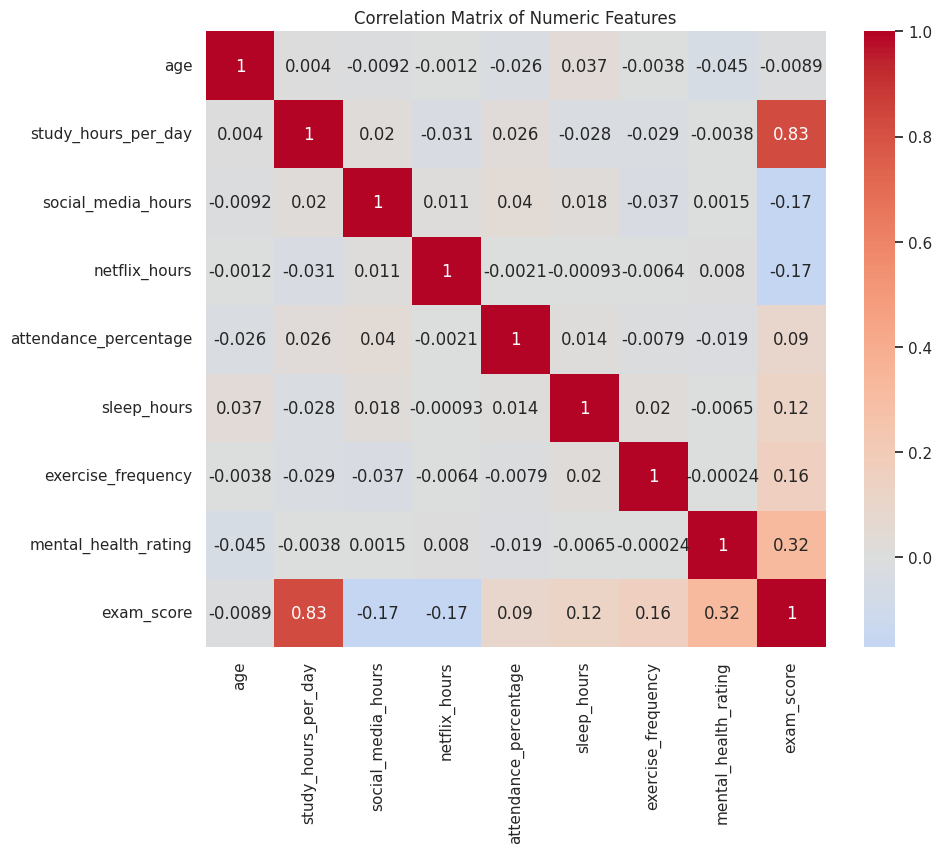

In [ ]:
# Bivariate correlation heat map
plt.figure(figsize=(10, 8))
sns.heatmap(student_df[num_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

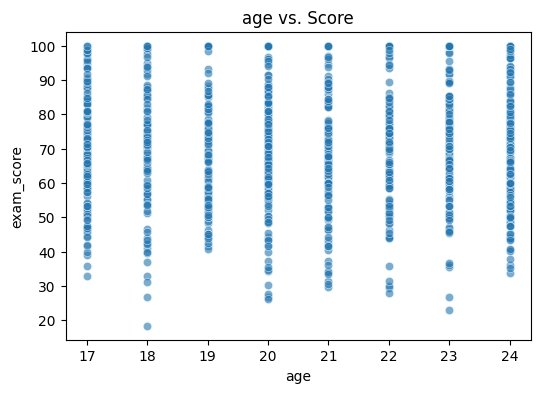

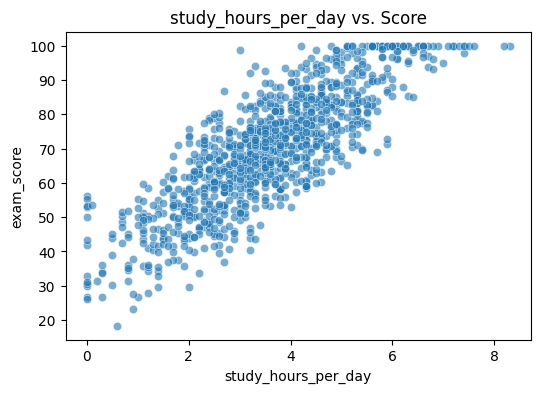

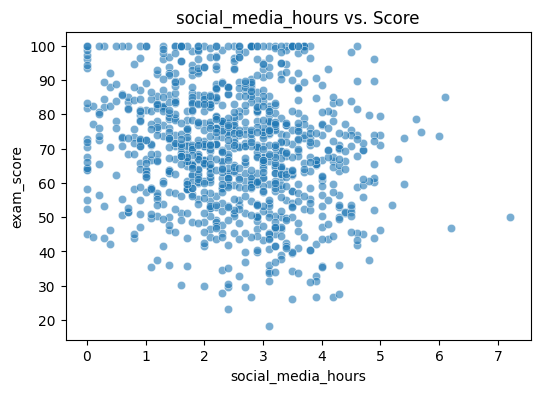

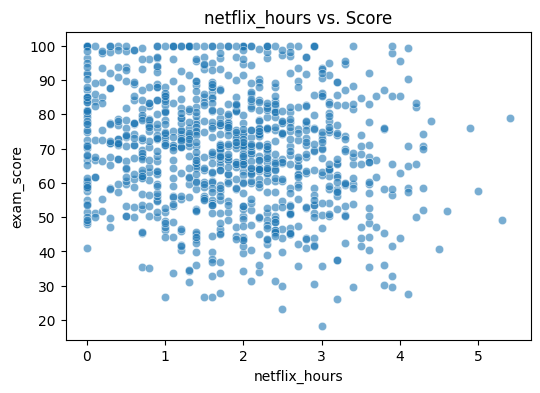

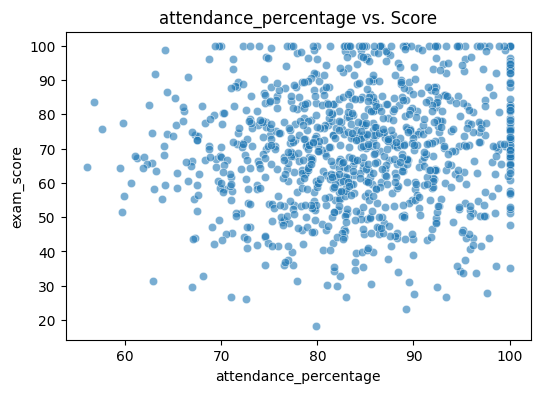

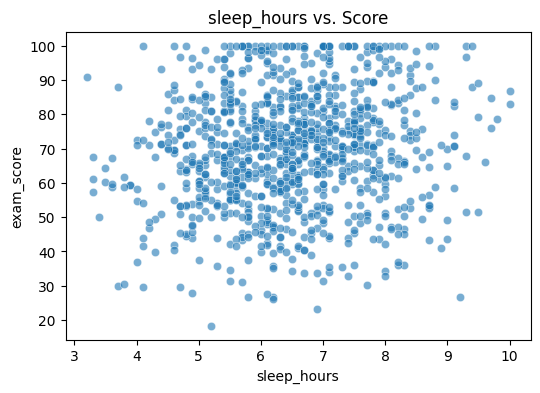

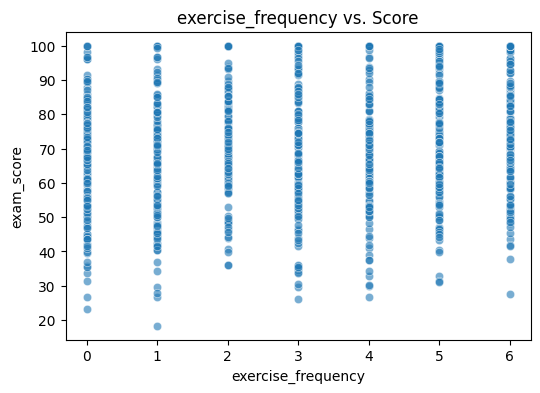

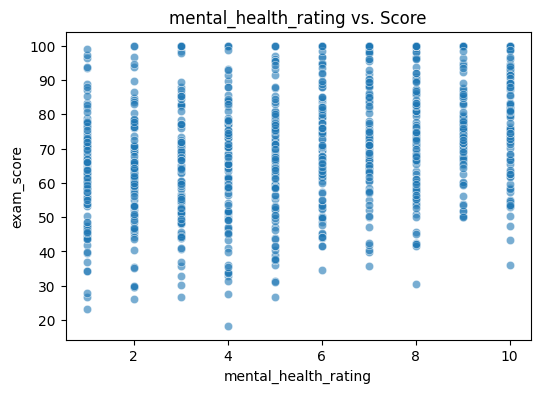

<ipython-input-7-1c75eac6fc77>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='exam_score', data=student_df, palette='Set2')


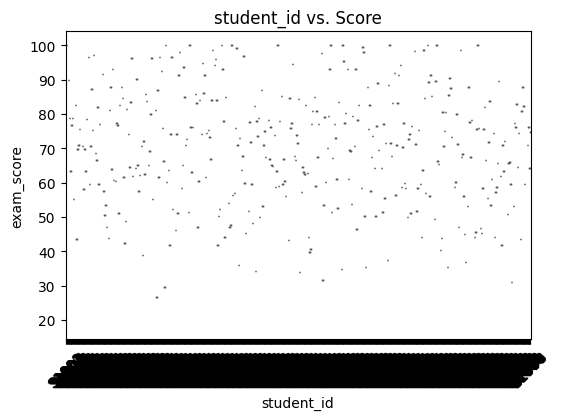

<ipython-input-7-1c75eac6fc77>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='exam_score', data=student_df, palette='Set2')


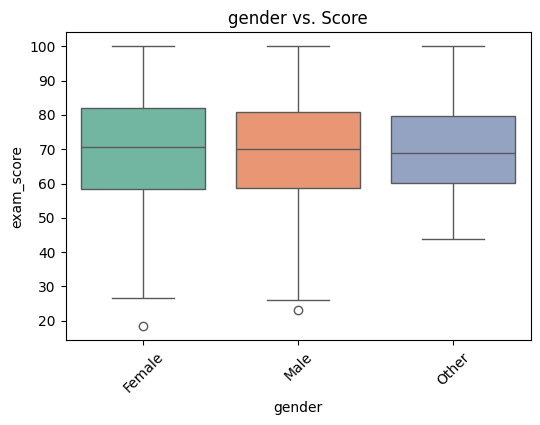

<ipython-input-7-1c75eac6fc77>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='exam_score', data=student_df, palette='Set2')


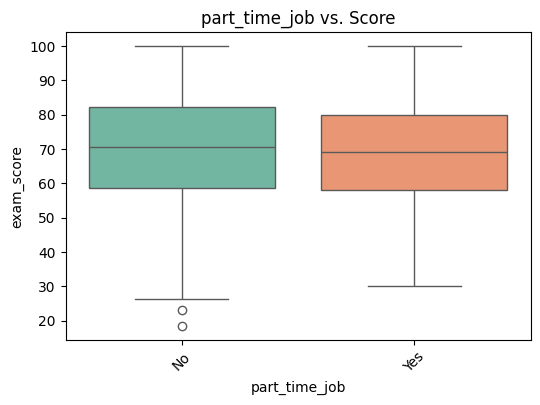

<ipython-input-7-1c75eac6fc77>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='exam_score', data=student_df, palette='Set2')


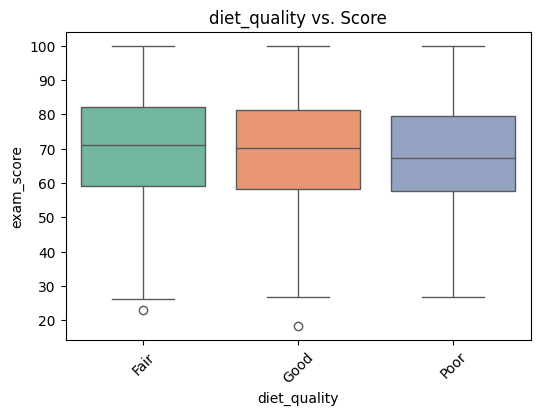

<ipython-input-7-1c75eac6fc77>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='exam_score', data=student_df, palette='Set2')


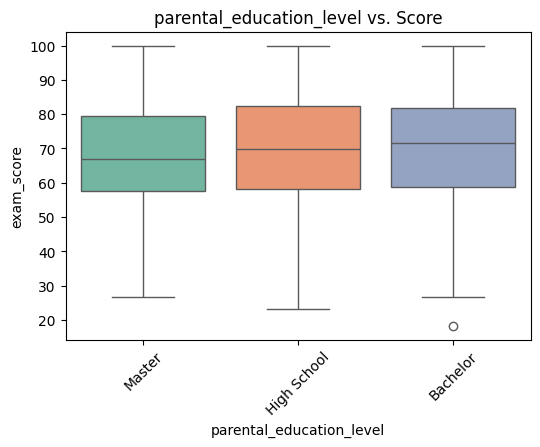

<ipython-input-7-1c75eac6fc77>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='exam_score', data=student_df, palette='Set2')


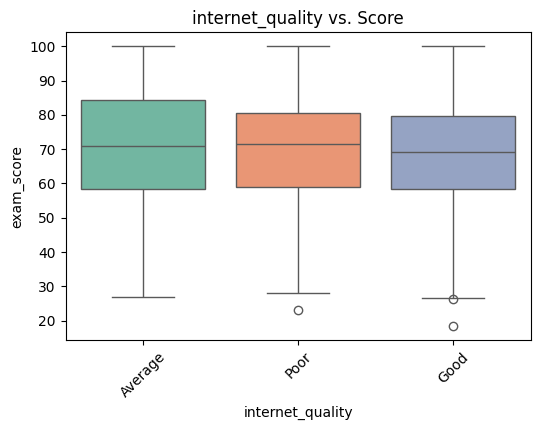

<ipython-input-7-1c75eac6fc77>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='exam_score', data=student_df, palette='Set2')


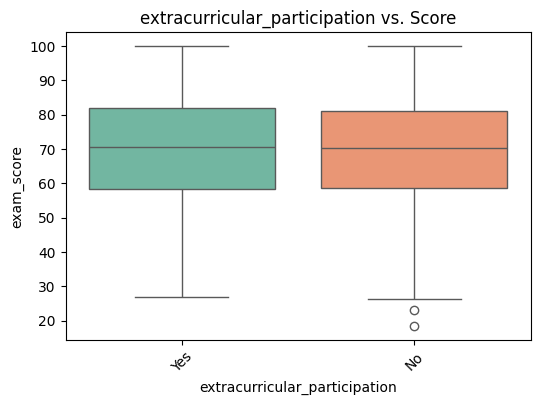

In [ ]:
# Scatter numeric vs. score
for col in num_cols:
    if col != 'exam_score':  # replace 'score' with your actual target column
        plt.figure(figsize=(6,4))
        sns.scatterplot(x=col, y='exam_score', data=student_df, alpha=0.6)
        plt.title(f'{col} vs. Score')
        plt.show()

# Boxplot categorical vs. score
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=col, y='exam_score', data=student_df, palette='Set2')
    plt.title(f'{col} vs. Score')
    plt.xticks(rotation=45)
    plt.show()

<ipython-input-9-0ab134f072ed>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='study_bin', y='exam_score', data=student_df, ci=None, palette='viridis')
<ipython-input-9-0ab134f072ed>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='study_bin', y='exam_score', data=student_df, ci=None, palette='viridis')


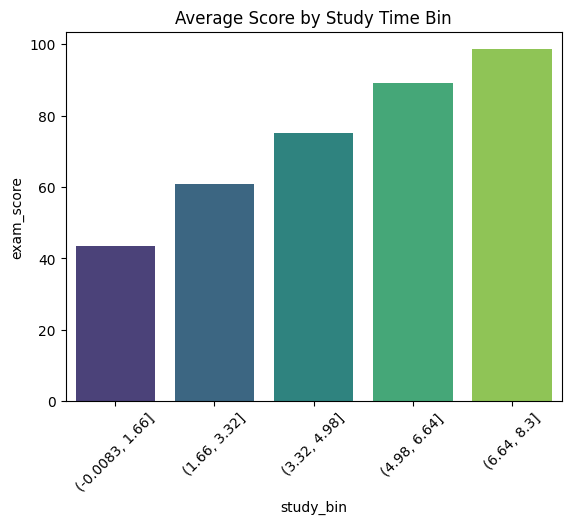

In [ ]:
# average score per study hour bucket
student_df['study_bin'] = pd.cut(student_df['study_hours_per_day'], bins=5)
sns.barplot(x='study_bin', y='exam_score', data=student_df, ci=None, palette='viridis')
plt.xticks(rotation=45)
plt.title('Average Score by Study Time Bin')
plt.show()

<ipython-input-10-cc7a49c1edbc>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-10-cc7a49c1edbc>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


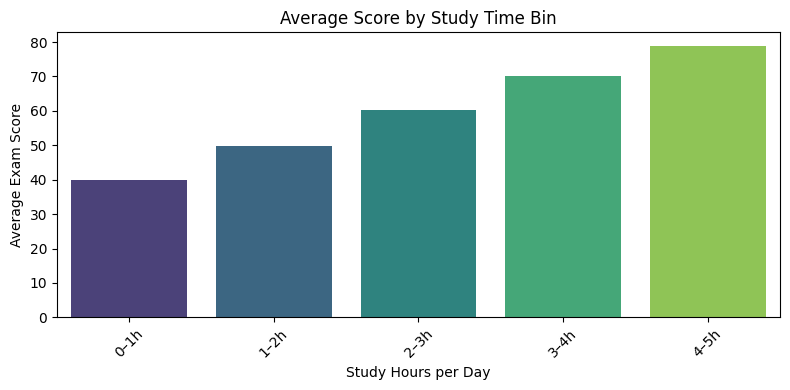

In [ ]:
# show positive relation between average score and study hour oer days
# Define cut points
bins = [0, 1, 2, 3, 4, 5]
labels = ['0–1h', '1–2h', '2–3h', '3–4h', '4–5h']

student_df['study_bin'] = pd.cut(
    student_df['study_hours_per_day'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

plt.figure(figsize=(8,4))
sns.barplot(
    x='study_bin',
    y='exam_score',
    data=student_df,
    ci=None,
    palette='viridis'
)

plt.title('Average Score by Study Time Bin')
plt.xlabel('Study Hours per Day')
plt.ylabel('Average Exam Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-10-342fb2f84c34>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-10-342fb2f84c34>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-10-342fb2f84c34>:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-10-342fb2f84c34>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


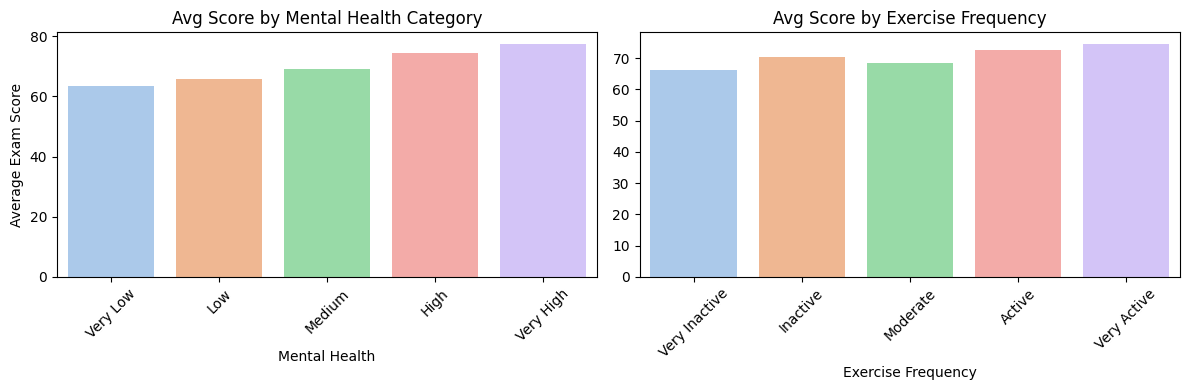

In [ ]:
# show positive relate on mental health, exercise to exam score
# Quantile bins for mental_health
student_df['mh_cat'] = pd.qcut(
    student_df['mental_health_rating'],
    q=5,
    labels=['Very Low','Low','Medium','High','Very High']
)

# Quantile bins for exercise_frequency (e.g. times per week)
student_df['ex_freq_cat'] = pd.qcut(
    student_df['exercise_frequency'],
    q=5,
    labels=['Very Inactive','Inactive','Moderate','Active','Very Active']
)

fig, axes = plt.subplots(1, 2, figsize=(12,4))

# Mental health vs score
sns.barplot(
    x='mh_cat', y='exam_score',
    data=student_df, ci=None,
    palette='pastel', ax=axes[0]
)
axes[0].set_title('Avg Score by Mental Health Category')
axes[0].set_xlabel('Mental Health')
axes[0].set_ylabel('Average Exam Score')
axes[0].tick_params(axis='x', rotation=45)

# Exercise frequency vs score
sns.barplot(
    x='ex_freq_cat', y='exam_score',
    data=student_df, ci=None,
    palette='pastel', ax=axes[1]
)
axes[1].set_title('Avg Score by Exercise Frequency')
axes[1].set_xlabel('Exercise Frequency')
axes[1].set_ylabel('')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

<ipython-input-11-2c12f7f305bd>:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-11-2c12f7f305bd>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-11-2c12f7f305bd>:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-11-2c12f7f305bd>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


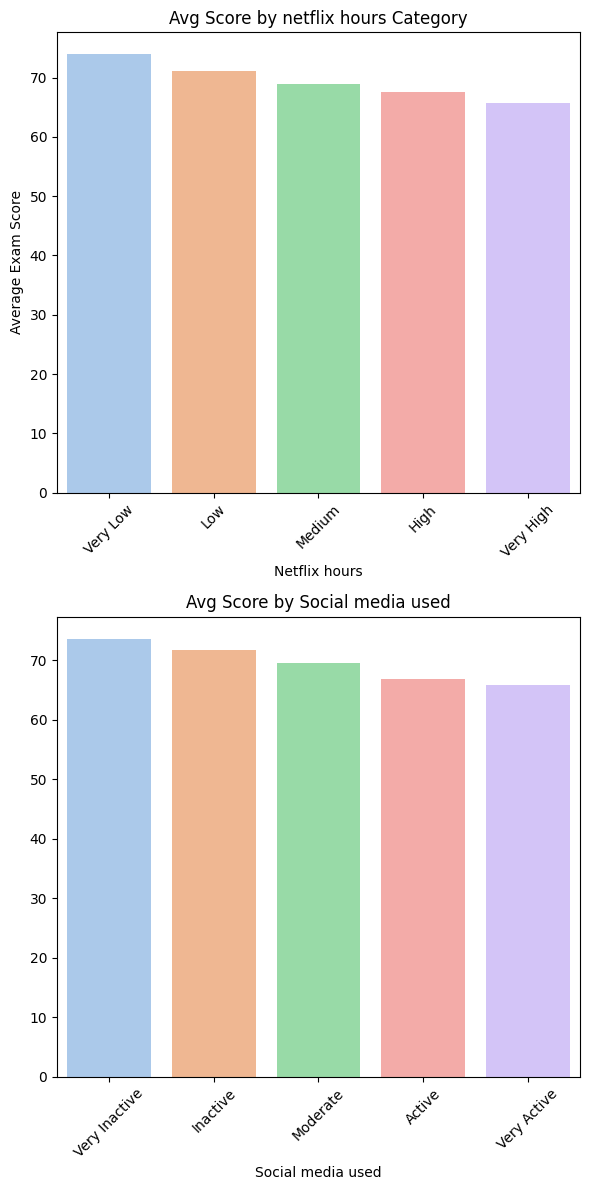

In [ ]:
# show negative relation on netflix, social media to exam score
# Quantile bins for netflix_hours
student_df['netflix_cat'] = pd.qcut(
    student_df['netflix_hours'],
    q=5,
    labels=['Very Low','Low','Medium','High','Very High']
)

# Quantile bins for social_media_hours
student_df['social_cat'] = pd.qcut(
    student_df['social_media_hours'],
    q=5,
    labels=['Very Inactive','Inactive','Moderate','Active','Very Active']
)

fig, axes = plt.subplots(2, 1, figsize=(6,12))

# Netflix hours vs score
sns.barplot(
    x='netflix_cat', y='exam_score',
    data=student_df, ci=None,
    palette='pastel', ax=axes[0]
)
axes[0].set_title('Avg Score by netflix hours Category')
axes[0].set_xlabel('Netflix hours')
axes[0].set_ylabel('Average Exam Score')
axes[0].tick_params(axis='x', rotation=45)

# Social media used vs score
sns.barplot(
    x='social_cat', y='exam_score',
    data=student_df, ci=None,
    palette='pastel', ax=axes[1]
)
axes[1].set_title('Avg Score by Social media used')
axes[1].set_xlabel('Social media used')
axes[1].set_ylabel('')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

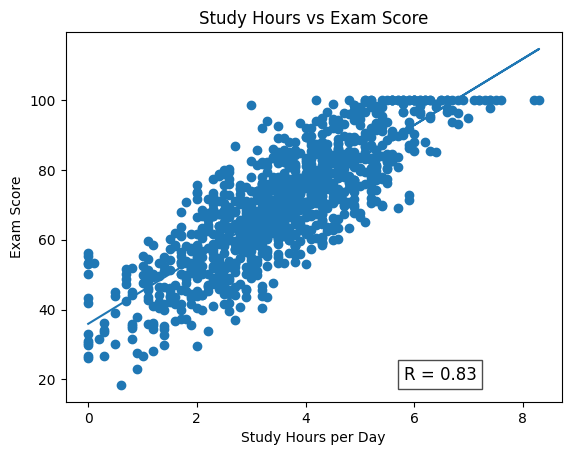

In [16]:
# linear regression on study_hours_per_day and exam_score
import scipy.stats as stats
x = student_df['study_hours_per_day']
y = student_df['exam_score']

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
def linear_fucntion(x):
  return slope * x + intercept

linear_model = list(map(linear_fucntion, x))

plt.plot(x, linear_model)
plt.scatter(x, y)
plt.title('Study Hours vs Exam Score')
plt.xlabel('Study Hours per Day')
plt.ylabel('Exam Score')
plt.text(
    x.max() * 0.7,
    y.max() * 0.2,
    f'R = {r_value:.2f}',
    fontsize=12,
    color='black',
    bbox=dict(facecolor='white', alpha=0.7)
)
plt.show()

# train/test split 800/200
